#**Dask**

Con Dask y *dask.delayed* se pueden ejecutar códigos en paralelo.

In [7]:
!pip install dask


distributed.nanny - WARNING - Restarting worker


distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker


Inicialmente se van a definir dos funciones para ver cuánto tardan en correr por separado.

In [11]:
from time import sleep

def inc(x):
    sleep(1)
    return x+1

def add(x, y):
    sleep(1)
    return(x+y)


In [12]:
%%time
x = inc(1)
y = inc(3)
z = add(x, y)

CPU times: user 636 ms, sys: 114 ms, total: 750 ms
Wall time: 3 s


Se observa que al estar construidas de forma secuencial, tardan 3 segundos en ejecutarse. A continuación se van a correr en paralelo las funciones *inc* y *add* y se va a presentar el tiempo que tardan en ejecutarse.

In [9]:
from dask import delayed

In [13]:
%%time

x = delayed(inc)(1)
y = delayed(inc)(2)
z = delayed(add)(x,y)

CPU times: user 1.43 ms, sys: 0 ns, total: 1.43 ms
Wall time: 1.29 ms


Dask crea un grafo para realizar el cálculo, por lo que en esta ocasión, las funciones corren de inmediato.

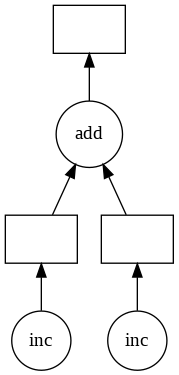

In [14]:
z.visualize()

El comamdo *compute()* del objeto z permite obtener el resultado de la función especificada. Esto se ejecuta mucho más rápido que el código original.

In [18]:
%%time
z.compute()

CPU times: user 483 ms, sys: 98.8 ms, total: 582 ms
Wall time: 2.01 s


5

A continuación se va a paralelizar un bucle *for*

In [21]:
data = [1,2,3,4,5,6,7,8]

In [22]:
%%time


results = []
for x in data:
    y = inc(x)
    results.append(y)
    
total = sum(results)

distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker


CPU times: user 1.75 s, sys: 329 ms, total: 2.08 s
Wall time: 8.01 s


Al correr el código de forma regular, el procesamiento tarda 8 segundos. Si se usa *delayed*, dask genera el grafo de computo y se prepara para ejecutarlo en paralelo. 

In [23]:
%%time
results = []

for x in data:
    y = delayed(inc)(x)
    results.append(y)
    
total = delayed(sum)(results)
print('El objeto total es:', total)  # Veámos que cosa es total
result = total.compute()
print('Resultado del cálculo', result)  # Resultado del cálculo

El objeto total es: Delayed('sum-d13b1459-c486-43bd-a37a-4e9b24628c6a')
Resultado del cálculo 44
CPU times: user 927 ms, sys: 159 ms, total: 1.09 s
Wall time: 4.01 s


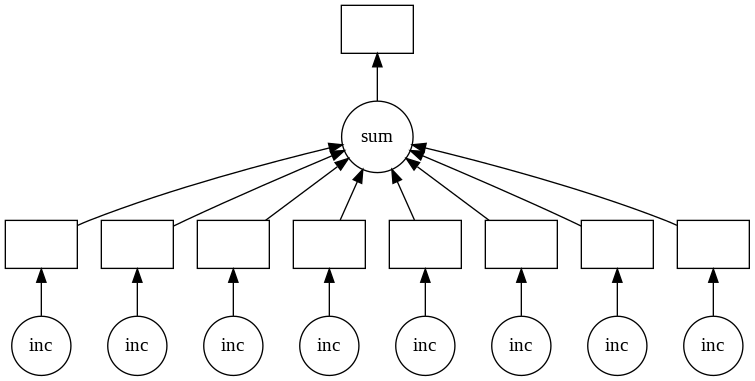

In [24]:
total.visualize()